<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_Exercise_Session_1_ANN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Simple Neural Network from Scratch with PyTorch and Google Colab

Before we look at why neural networks work, it’s important to understand what neural networks do. Before we can grasp the design of a neural network, we must first understand what a neuron performs.

1. First, a weight is being applied to each input to an artificial neuron. 
2. Second, the inputs are multiplied by their weights, and then a bias is applied to the outcome. This is called the weighted sum. 
3. Third, the weighted sum is processed via an activation function, as a non-linear function.

![image.png](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/13UpdymQx-C1tBKRnfD7eOg.gif)

The neural network can compare the outputs of its nodes with the desired values using a property known as the delta rule, allowing the network to alter its weights through training to create more accurate output values. This training and learning procedure results in gradient descent. 

The technique of updating weights in multi-layered perceptrons is virtually the same, however, the process is referred to as back-propagation. In such circumstances, the output values provided by the final layer are used to alter each hidden layer inside the network.

In order to build a neural network, the following steps must be followed:

1. Creating a FeedForwardNetwork
2. FeedForward Evaluation
3. Backward / Gradient Calculation
4. Back Propagation
5. Training

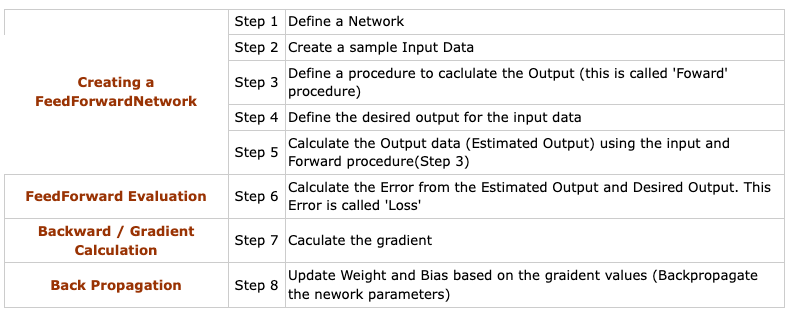

# Creating a simple Artificial Neural Network with 1 node and training with 1 sample of data



nn.Linear(n,m) is a module that creates single layer feed forward network with n inputs and m output. Mathematically, this module is designed to calculate the linear equation Ax = b where x is input, b is output, A is weight. This is where the name 'Linear' came from.

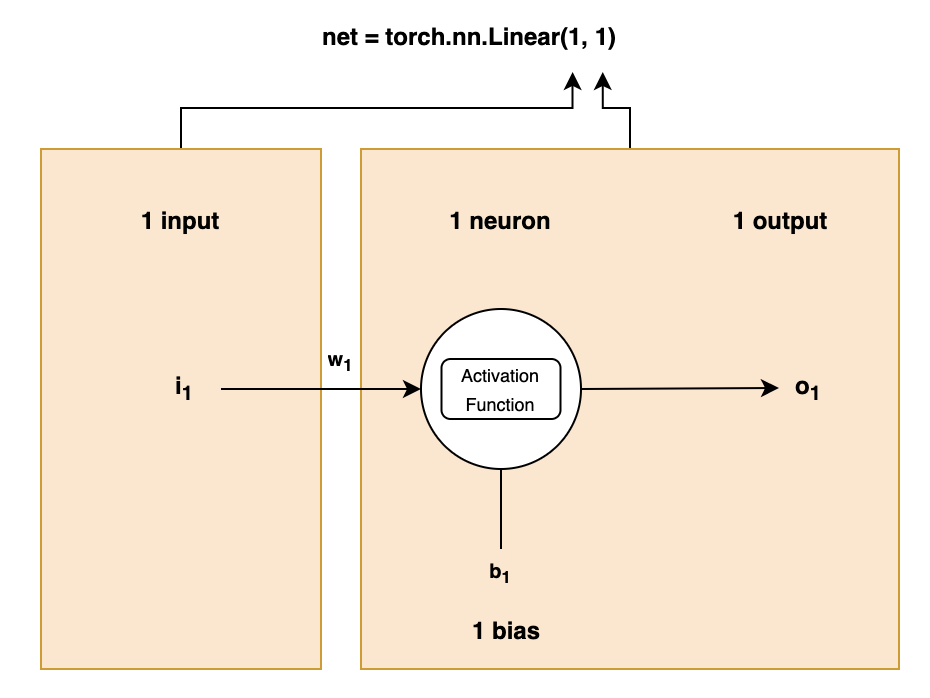

The torch module provides all the necessary tensor operators you will need to implement your first neural network from scratch in PyTorch. That's right! In PyTorch everything is a Tensor, so this is the first thing you will need to get used to. Let's import the libraries we will need for this tutorial.

In [3]:
# Importing Required Libraries
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean
from sklearn.preprocessing import MinMaxScaler

Let's start by creating some sample data using the torch.tensor command. In Numpy, this could be done with np.array. Both functions serve the same purpose, but in PyTorch everything is a Tensor as opposed to a vector or matrix. 

In [4]:
x = torch.tensor([[0.1]])
y = torch.tensor([[1.2]])
print("input:  ",x)
print('Target:  ', y)

input:   tensor([[0.1000]])
Target:   tensor([[1.2000]])


You can check the type of the tensors we have just created with the dtype command.

In [5]:
print(x.dtype)
print(y.dtype)

torch.float32
torch.float32


## 1. Creating a FeedForwardNetwork

A neuron consists of two parts, a linear part and an activation function. It is the activation function that performs the non-linearity part of the neuron. To create the first step, we use torch.nn.linear.

In [6]:
model_net1 = torch.nn.Linear(1,1)

In [7]:
print('network structure (torch.nn.Linear(1,1)):  ',model_net1)
print('Weight of network:  ',model_net1.weight)
print('Bias of network: ',model_net1.bias)

network structure (torch.nn.Linear(1,1)):   Linear(in_features=1, out_features=1, bias=True)
Weight of network:   Parameter containing:
tensor([[-0.8089]], requires_grad=True)
Bias of network:  Parameter containing:
tensor([-0.5601], requires_grad=True)


Using torch.nn.type_of_activationfunction, we can define an activation function for the neuron.

In [8]:
model_net1_actfun = torch.nn.Sigmoid()

These two steps can be connected using forward(). We can therefore provide the output by using this process. 

In [9]:
# torch.mm(net.weight,x.t()) + net.bias

output = model_net1_actfun.forward(model_net1.forward(x))
print('Output: ',output)

Output:  tensor([[0.3450]], grad_fn=<SigmoidBackward0>)


## 2. FeedForward Evaluation

Evaluation of feedforward refers to the process of assessing the performance of a feedforward neural network using the current weights, to produce predictions. These predictions are then compared to the actual target outputs to measure the accuracy of the network.

The metrics used for evaluation can vary, but common ones include mean squared error, cross-entropy loss, and so for. The results of the evaluation can provide insights into how well the network predicts and how to further improve the network through hyperparameter tuning.

In [10]:
# define the error function (loss fuction)
loss_mse = torch.nn.MSELoss()
loss = loss_mse(output, y)
print('Loss: ',loss)

Loss:  tensor(0.7310, grad_fn=<MseLossBackward0>)


##3. Backward / Gradient Calculation

In this step, the error is used to calculate the gradient of the loss with respect to the weights. This gradient can be used to update the parameters using gradient descent optimization, in order to minimize the loss and improve the network's accuracy. 

In [11]:
# NOTE : you see 'None' here since backward() hasn't been executed yet
print('Weight gradient:  ',model_net1.weight.grad)
print('Bias gradient:  ',model_net1.bias.grad)

Weight gradient:   None
Bias gradient:   None


In [12]:
loss.backward()

In [13]:
print('Weight gradient:  ', model_net1.weight.grad)
print('Bias gradient:  ', model_net1.bias.grad)

Weight gradient:   tensor([[-0.0386]])
Bias gradient:   tensor([-0.3864])


##4. Back Propagation

Backpropagation is the process of updating the weights of the neurons in a neural network in order to minimize the loss or error. It is called "backward" because the error is propagated backward through the network from the output layer to the input layer which is used to update the weights in the opposite direction of the gradient to minimize the loss.

In [14]:
print('Weight of network:  ', model_net1.weight)
print('Bias of network:  ', model_net1.bias)

Weight of network:   Parameter containing:
tensor([[-0.8089]], requires_grad=True)
Bias of network:   Parameter containing:
tensor([-0.5601], requires_grad=True)


In [15]:
optimizer = torch.optim.RMSprop(model_net1.parameters(), lr=0.05)
optimizer.step()

In [16]:
print('Weight gradient:  ', model_net1.weight.grad)
print('Bias gradient:  ', model_net1.bias.grad)

Weight gradient:   tensor([[-0.0386]])
Bias gradient:   tensor([-0.3864])


In [17]:
output = model_net1_actfun.forward(model_net1.forward(x))

print('Output:  ',output)

Output:   tensor([[0.4773]], grad_fn=<SigmoidBackward0>)


## 5. Training

In [18]:
# Initializing Hyperparameters
epochs = 1000
learning_rate = 0.1
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net1 = torch.nn.Linear(1,1)
model_net1_actfun = torch.nn.Sigmoid()
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net1.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      output = model_net1_actfun.forward(model_net1.forward(x))
      # 2. FeedForward Evaluation
      loss = loss_mse(output, y)
      optimizer.zero_grad();

      # 3. Backward / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      loss_set[i] = loss

      # Display the loss after every 10 epochs
      if (i % 10)==0:
        print (f"Loss: {list(loss_set.values())[i]}")
      # 4. Back Propagation
      optimizer.step()

<ipython-input-18-813645f1a21d>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

Loss: 0.2410835176706314
Loss: 0.05397918075323105
Loss: 0.04782436788082123
Loss: 0.04541359841823578
Loss: 0.04410780221223831
Loss: 0.04328431189060211
Loss: 0.04271622747182846
Loss: 0.04230024665594101
Loss: 0.04198236018419266
Loss: 0.04173161834478378
Loss: 0.041528813540935516
Loss: 0.041361529380083084
Loss: 0.04122129827737808
Loss: 0.04110213369131088
Loss: 0.040999677032232285
Loss: 0.04091080278158188
Loss: 0.0408330075442791
Loss: 0.04076440632343292
Loss: 0.040703561156988144
Loss: 0.04064922407269478
Loss: 0.0406004972755909
Loss: 0.0405566468834877
Loss: 0.04051695019006729
Loss: 0.04048091545701027
Loss: 0.04044808819890022
Loss: 0.040418051183223724
Loss: 0.04039059206843376
Loss: 0.04036534205079079
Loss: 0.04034211486577988
Loss: 0.04032064229249954
Loss: 0.040300872176885605
Loss: 0.0402824692428112
Loss: 0.040265459567308426
Loss: 0.04024962708353996
Loss: 0.040234919637441635
Loss: 0.04022121801972389
Loss: 0.04020845144987106
Loss: 0.04019652679562569
Loss: 0.0

Let's check the neuron's parameters after training:

In [19]:
print('Weight gradient:  ', model_net1.weight)
print('Bias gradient:  ', model_net1.bias)

Weight gradient:   Parameter containing:
tensor([[9.3290]], requires_grad=True)
Bias gradient:   Parameter containing:
tensor([9.9944], requires_grad=True)


In [20]:
def sigmoid(x):
 return 1/(1 + np.exp(-x))

In [21]:
output = model_net1_actfun.forward(model_net1.forward(x))

print('Output:  ',output)

Output:   tensor([[1.0000]], grad_fn=<SigmoidBackward0>)


In [22]:
#  sigmoid(wx+b)
sigmoid(10.24)

0.9999642884257205

# Creating a simple Artificial Neural Network with 1 node and training with a dataset

In [23]:
# load dataset (Swedish Auto Insurance dataset)
data = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')

In [24]:
# Scaling
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data)
data_s = pd.DataFrame(data_scaled, columns=data.columns)

In [25]:
# define input (X) and output (y)

X_tensor = torch.tensor(data_s.iloc[:, :-1].astype(np.float32).values)
y_tensor = torch.tensor(data_s.iloc[:, -1:].astype(np.float32).values)

In [26]:
print(X_tensor.dtype)
print(y_tensor.dtype)

torch.float32
torch.float32


In [27]:
print(X_tensor.shape)
print(y_tensor.shape)

torch.Size([63, 1])
torch.Size([63, 1])


## 5. Training ANN through Swedish Auto Insurance dataset


In [28]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net2 = torch.nn.Linear(1,1)
model_net2_actfun = torch.nn.Sigmoid()
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net2.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net2_actfun.forward(model_net2.forward(x.float()))
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()

          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
        
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-28-3ef17eef7f00>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.07217061519622803
Loss: 0.029561342671513557
Loss: 0.016294289380311966
Loss: 0.01021272037178278
Loss: 0.008724875748157501
Loss: 0.008447124622762203
Loss: 0.008382225409150124
Loss: 0.008364105597138405
Loss: 0.008358356542885303
Loss: 0.00835630763322115


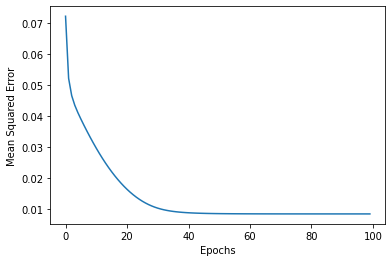

In [29]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

## 5. Training ANN through Swedish Auto Insurance dataset with 1 hidden layer

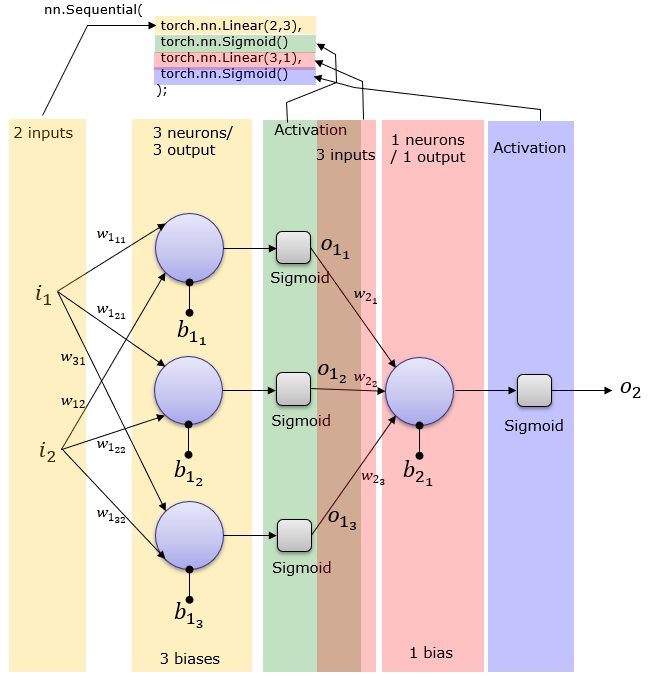

In [30]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a Neural Network
model_net3 = torch.nn.Sequential(torch.nn.Linear(1,3),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.ReLU()
                                 );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net3.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net3.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-30-0ad25dd79864>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.020628346130251884
Loss: 0.007740225177258253
Loss: 0.007779249921441078
Loss: 0.007776799611747265
Loss: 0.007766712456941605
Loss: 0.007752886973321438
Loss: 0.00754046905785799
Loss: 0.007555861491709948
Loss: 0.007644969504326582
Loss: 0.00757194310426712


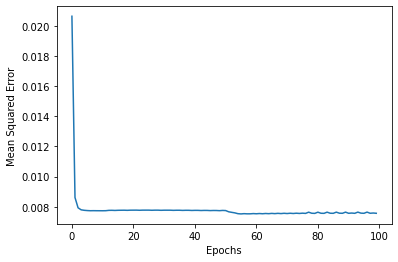

In [31]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

## 5. Training ANN through Swedish Auto Insurance dataset with 2 hidden layer

In [32]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(1,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-32-12da485a4403>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.04120935499668121
Loss: 0.008301040157675743
Loss: 0.008202669210731983
Loss: 0.008250989019870758
Loss: 0.008200796321034431
Loss: 0.007748703472316265
Loss: 0.0074410284869372845
Loss: 0.007386465556919575
Loss: 0.007463211193680763
Loss: 0.007424455601722002


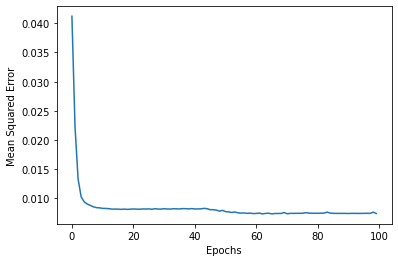

In [33]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

# Saving the trained model


In [34]:
# Now lets save our trained model
# save the trained model
torch.save(model_net4, 'model_net4.pkl')

# Loading the saved model


In [35]:
#   Lets load the model for inference

model = torch.load('model_net4.pkl')
model.eval()

Sequential(
  (0): Linear(in_features=1, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)

# Testing the trained model


In [37]:
model(torch.tensor([0.153226]))

tensor([0.2954], grad_fn=<SigmoidBackward0>)

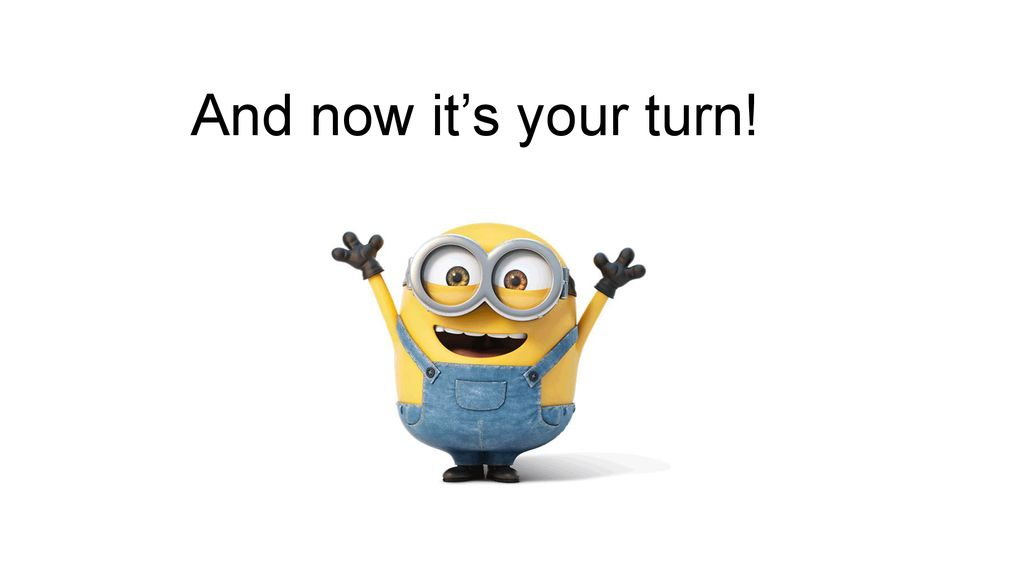

Train ANN through Customer Churn data with 1 and 2 hidden layers!

In [38]:
import pandas as pd

data_raw = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/customer_churn_data.csv')


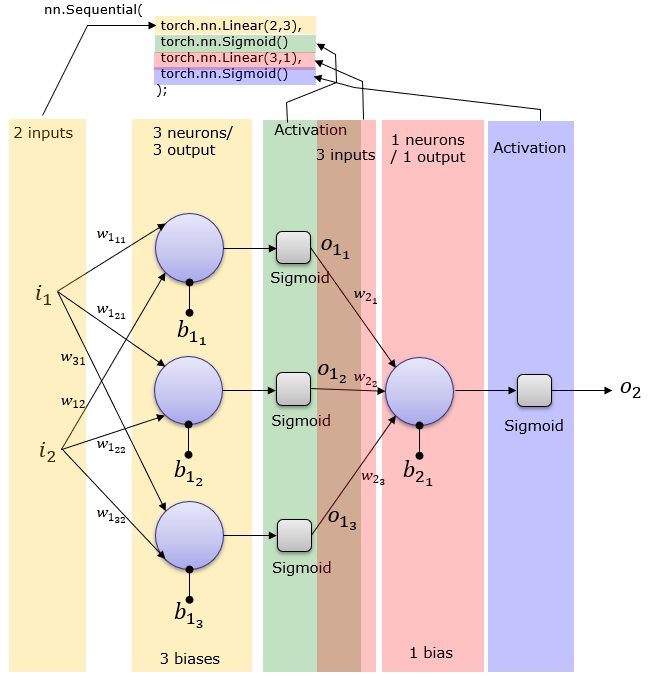

In [39]:
data_raw.head()

,customerID,gender_encod,SeniorCitizen,MonthlyCharges,TotalCharges,churn_encod
0,7590-VHVEG,0,0,29.85,29.85,0
1,5575-GNVDE,1,0,56.95,1889.50,0
2,3668-QPYBK,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,42.30,1840.75,0
4,9237-HQITU,0,0,70.70,151.65,1


In [40]:
#Define the scaler and divide cateogrical from numerical data
scaler = MinMaxScaler()
numerical_col = data_raw[['MonthlyCharges', 'TotalCharges']]
categorical_col = data_raw.drop(columns=['MonthlyCharges', 'TotalCharges'])

#Scaling
data_scaled = scaler.fit_transform(numerical_col)
data_s = pd.DataFrame(data_scaled, columns=['MonthlyCharges_scaled', 'TotalCharges_scaled'] )

In [41]:
#Merge back the scaled data with the rest
final_data = pd.concat([categorical_col,data_s], axis=1)

In [42]:
final_data.head(5)

,customerID,gender_encod,SeniorCitizen,churn_encod,MonthlyCharges_scaled,TotalCharges_scaled
0,7590-VHVEG,0,0,0,0.115423,0.001275
1,5575-GNVDE,1,0,0,0.385075,0.215867
2,3668-QPYBK,1,0,1,0.354229,0.010310
3,7795-CFOCW,1,0,0,0.239303,0.210241
4,9237-HQITU,0,0,1,0.521891,0.015330
